# **(CODE INSTITUDE PROJECT ETL)**

---

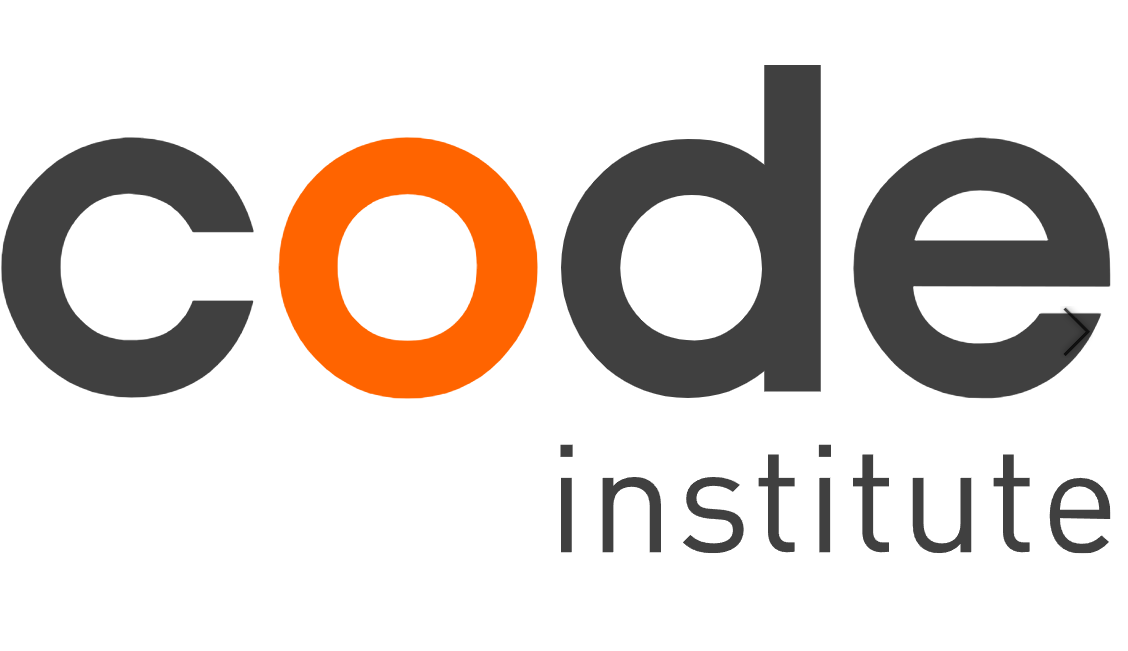

# Retail Sales ETL and Visualization Project

* Project Overview
This project demonstrates a complete ETL (Extract, Transform, Load) pipeline and exploratory visualizations for retail sales data.  
The dataset contains weekly sales data alongside external factors such as temperature, fuel price, holiday indicators, and markdown discounts.  


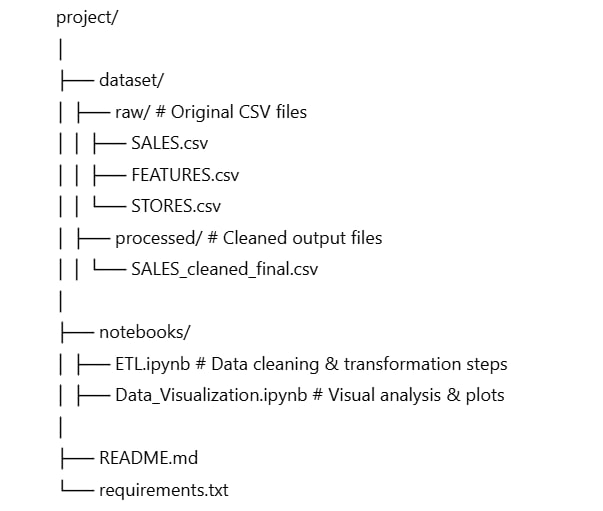

# **(Analysing the First Dataset)**

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Legion\\Desktop\\my_project\\Practice-Funicular1\\practice-funicular1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Legion\\Desktop\\my_project\\Practice-Funicular1\\practice-funicular1'

# Section 1

Section 1 content

In [4]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
df = pd.read_csv('dataset/raw/FEATURES.csv') #Extract – Load the CSV files
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df.shape # (1000, 10) - 1000 rows and 10 columns

(8190, 12)

In [7]:
df.dtypes # Check the data types of each column
df.info() # Get a concise summary of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
df.describe()# Get a statistical summary of the DataFrame

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
df.isnull().sum() # Check for missing values in each column 


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [10]:
print(df.columns)# Get the column names of the DataFrame


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [11]:
df = df.drop_duplicates() # Remove duplicate rows from the DataFrame

In [12]:
df.info() # Check the DataFrame again to confirm changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
# Check available columns
print("Available columns:", df.columns.tolist())

# Strip any accidental spaces from column names
df.columns = df.columns.str.strip()

# Describe 'Size' column if it exists
if 'Size' in df.columns:
    print(df['Size'].describe())
else:
    print("Column 'Size' not found in DataFrame.")

# Show unique values in 'Type' column if it exists
if 'Type' in df.columns:
    print(df['Type'].unique())
else:
    print("Column 'Type' not found in DataFrame.")


Available columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Column 'Size' not found in DataFrame.
Column 'Type' not found in DataFrame.


In [ ]:
df['Type'] = df['Type'].str.strip().str.lower() # Normalize the 'Type' column by stripping whitespace and converting to lowercase

In [ ]:
df.duplicated().sum() # Check for duplicates after normalization


In [ ]:
df = df.drop_duplicates() # Remove duplicate rows from the DataFrame


In [ ]:
df.replace( {'Store': {1: 'Store_1', 2: 'Store_2', 3: 'Store_3', 4: 'Store_4', 5: 'Store_5'}}, inplace=True)# Rename the 'Store' column values for better readability

In [ ]:
df.head() # Check the DataFrame after renaming the 'Store' column values

In [ ]:
df['Type'] = df['Type'].astype('category') # Convert the 'Type' column to a categorical data type for better memory efficiency and performance


In [ ]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Check that NaNs are gone
print(df[markdown_cols].isnull().sum())

# Save the cleaned version
df.to_csv('FEATURES_cleaned.csv', index=False) #` Save the cleaned DataFrame to a new CSV file


In [ ]:
import pandas as pd

# 1️⃣ Load the original dataset
df = pd.read_csv('dataset/raw/FEATURES.csv')

# 2️⃣ Remove duplicates (if any)
df = df.drop_duplicates()


# 4️⃣ Save the cleaned version as a new CSV
df.to_csv('dataset/Processed/FEATURES_cleaned.csv', index=False)

# 5️⃣ Load the cleaned version whenever you need it
df_cleaned = pd.read_csv('dataset/processed/FEATURES_cleaned.csv')

# Check the first few rows
print(df_cleaned.head())


In [ ]:
# Load your dataset
df = pd.read_csv('dataset/raw/FEATURES.csv')

# Replace NaN in MarkDown columns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Verify there are no more NaNs
print(df.isnull().sum())

# Save the fully cleaned dataset
df.to_csv('FEATURES_cleaned.csv', index=False) # Save the cleaned DataFrame to a new CSV file

In [ ]:
df.columns # ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# **(Second Dataset)**

In [ ]:
E - EXTRACT: Load the Data


import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('dataset/raw/SALES.csv') # Load the dataset
df.head() # Check the first few rows of the DataFrame

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
print(df.isnull().sum())# Check for missing values in each column

In [ ]:
print(df.isnull().values.any())# Check if there are any NaN values in the DataFrame


In [ ]:
print(df[df.isnull().any(axis=1)])# Display rows with any NaN values


In [ ]:
T - TRANSFORM: Data Cleaning
## 1. Fill missing values

# Fill NaNs in markdown columns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Fill NaNs in CPI and Unemployment with column mean
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())

# Verify that there are no more NaNs
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv('SALES_cleaned.csv', index=False)

In [ ]:
df = df.drop_duplicates()# Remove duplicate rows from the DataFrame

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)# Convert 'Date' column to datetime format

In [ ]:
print(df.isnull().sum())# Check for missing values in each column


In [ ]:
print(df.duplicated().sum()) # Check for duplicates after normalization


In [ ]:
print(df.dtypes)


In [ ]:
#Clip invalid values
df[markdown_cols] = df[markdown_cols].clip(lower=0)  # Replace negatives with 0

In [ ]:
print(df.describe())  # min, max, mean, etc


In [ ]:
# Check min and max values
print(df[['Temperature','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].describe())


In [ ]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df[markdown_cols] = df[markdown_cols].clip(lower=0)  # replaces negative values with 0


In [ ]:
df.to_csv('dataset/processed/SALES_cleaned_final.csv', index=False)


# **(Last Dataset)**

---

In [ ]:
df = pd.read_csv('dataset/raw/STORES.csv') # Load the dataset
df.head()

In [ ]:
df.info() # Check the DataFrame again to confirm changes(dataset shows there is no NaN values)and df.shape # (45, 6) - 45 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           8190 non-null   int64  
 1   Date            8190 non-null   object 
 2   Temperature     8190 non-null   float64
 3   Fuel_Price      8190 non-null   float64
 4   MarkDown1       4032 non-null   float64
 5   MarkDown2       2921 non-null   float64
 6   MarkDown3       3613 non-null   float64
 7   MarkDown4       3464 non-null   float64
 8   MarkDown5       4050 non-null   float64
 9   CPI             7605 non-null   float64
 10  Unemployment    7605 non-null   float64
 11  IsHoliday       8190 non-null   bool   
 12  Total_MarkDown  8190 non-null   float64
dtypes: bool(1), float64(10), int64(1), object(1)
memory usage: 775.9+ KB


In [ ]:
print(df.duplicated().sum())# Check for duplicates after normalization


In [ ]:
print(df.describe())# Get a statistical summary of the DataFrame (beause the dataset is small, it shows all the values in the dataset)


             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.7

In [ ]:
df['Total_MarkDown'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)# Calculate total markdown for each store


In [ ]:
print(df.isnull().sum()) # Check for missing values in each column


Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1         4158
MarkDown2         5269
MarkDown3         4577
MarkDown4         4726
MarkDown5         4140
CPI                585
Unemployment       585
IsHoliday            0
Total_MarkDown       0
dtype: int64


In [ ]:
df.to_csv('dataset/processed/STORES_cleaned_final.csv', index=False) # Save the cleaned DataFrame to a new CSV file

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
